# survey data experiments: combined RPLM 

Random parameter logit model

Test a model that uses results from v0,v2,v3

v1 excluded for now since the attribute level values are different.

Use a random coefficient model for cost or time.

Reminder about parameter coding: 
- drone choice=1
- ground choice=0

In [14]:
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


transformed_data_filepath = './choice-model-data-long.csv'

In [15]:
choices_df = pd.read_csv(transformed_data_filepath)
choices_df.head()

,ResponseId,QID,choice,v,gc,gt,dc,dt,dp,male,...,freq_takeout_food,v_type,g_cost,d_cost,g_time,d_time,d_privacy,d_time - g_time,d_cost - g_cost,ID
0,R_3dNdOyEHwO3X5Tg,CHOICE_v2_gc0_gt1_dc0_dt0_dp0_1.1,1,2,0,1,0,0,0,1,...,1,liquor store,0,0,20,15,0,-5,0,0
1,R_3dNdOyEHwO3X5Tg,CHOICE_v2_gc2_gt1_dc0_dt1_dp0_1.1,1,2,2,1,0,1,0,1,...,1,liquor store,3,0,20,20,0,0,-3,0
2,R_3dNdOyEHwO3X5Tg,CHOICE_v0_gc0_gt3_dc2_dt1_dp0_1.1,0,0,0,3,2,1,0,1,...,1,take-out food,0,3,45,20,0,-25,3,0
3,R_3dNdOyEHwO3X5Tg,CHOICE_v1_gc3_gt0_dc0_dt2_dp0_1.1,1,1,3,0,0,2,0,1,...,1,prescription medications,10,0,30,360,0,330,-10,0
4,R_3dNdOyEHwO3X5Tg,CHOICE_v2_gc3_gt3_dc0_dt3_dp0_1.1,1,2,3,3,0,3,0,1,...,1,liquor store,5,0,45,45,0,0,-5,0


In [16]:
import sys  
sys.path.insert(0, '../survey-questions')

from attributes import (
    VENDOR_TYPES, COST_LEVELS, TIME_LEVELS, DRONE_PRIVACY_LEVELS,
)

color_ground = 'blue'
color_drone = 'red'

def plot_points_tradeoff_by_size(df, vendor):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5), dpi=200)
    for dp, privacy in enumerate(DRONE_PRIVACY_LEVELS):
        ax = axes[dp]
        df_p = df[df['dp']==dp]
        df_p_agg = df_p[df_p['choice']==0].groupby(
            ['d_time - g_time','d_cost - g_cost']
        )['ResponseId'].count().rename('ground').to_frame()
        df_p_agg['drone'] = df_p_agg.index.map(df_p[df_p['choice']==1].groupby(
            ['d_time - g_time','d_cost - g_cost']
        )['ResponseId'].count())
        df_p_agg = df_p_agg.reset_index()
        ax.scatter(
            df_p_agg['d_time - g_time'],
            df_p_agg['d_cost - g_cost'],
            df_p_agg['ground'],
            color=color_ground, alpha=0.5, label='choice: ground vehicle',
            marker='o',
        )
        ax.scatter(
            df_p_agg['d_time - g_time'],
            df_p_agg['d_cost - g_cost'],
            df_p_agg['drone'],
            color=color_drone, alpha=0.5, label='choice: drone',
            marker='o',
        )   
        ax.set_xlabel('drone wait time - ground vehicle wait time (mins)')
        ax.set_ylabel('drone cost - ground vehicle cost (\$)')
        ax.axvline(c='grey', lw=1)
        _ = ax.axhline(c='grey', lw=1)
        _ = ax.set_title(privacy[1])
        ax.legend()
    title = ('%s: Ground vehicle vs Drone choice differences w.r.t. cost and time' % vendor)
    _ = fig.suptitle(title)

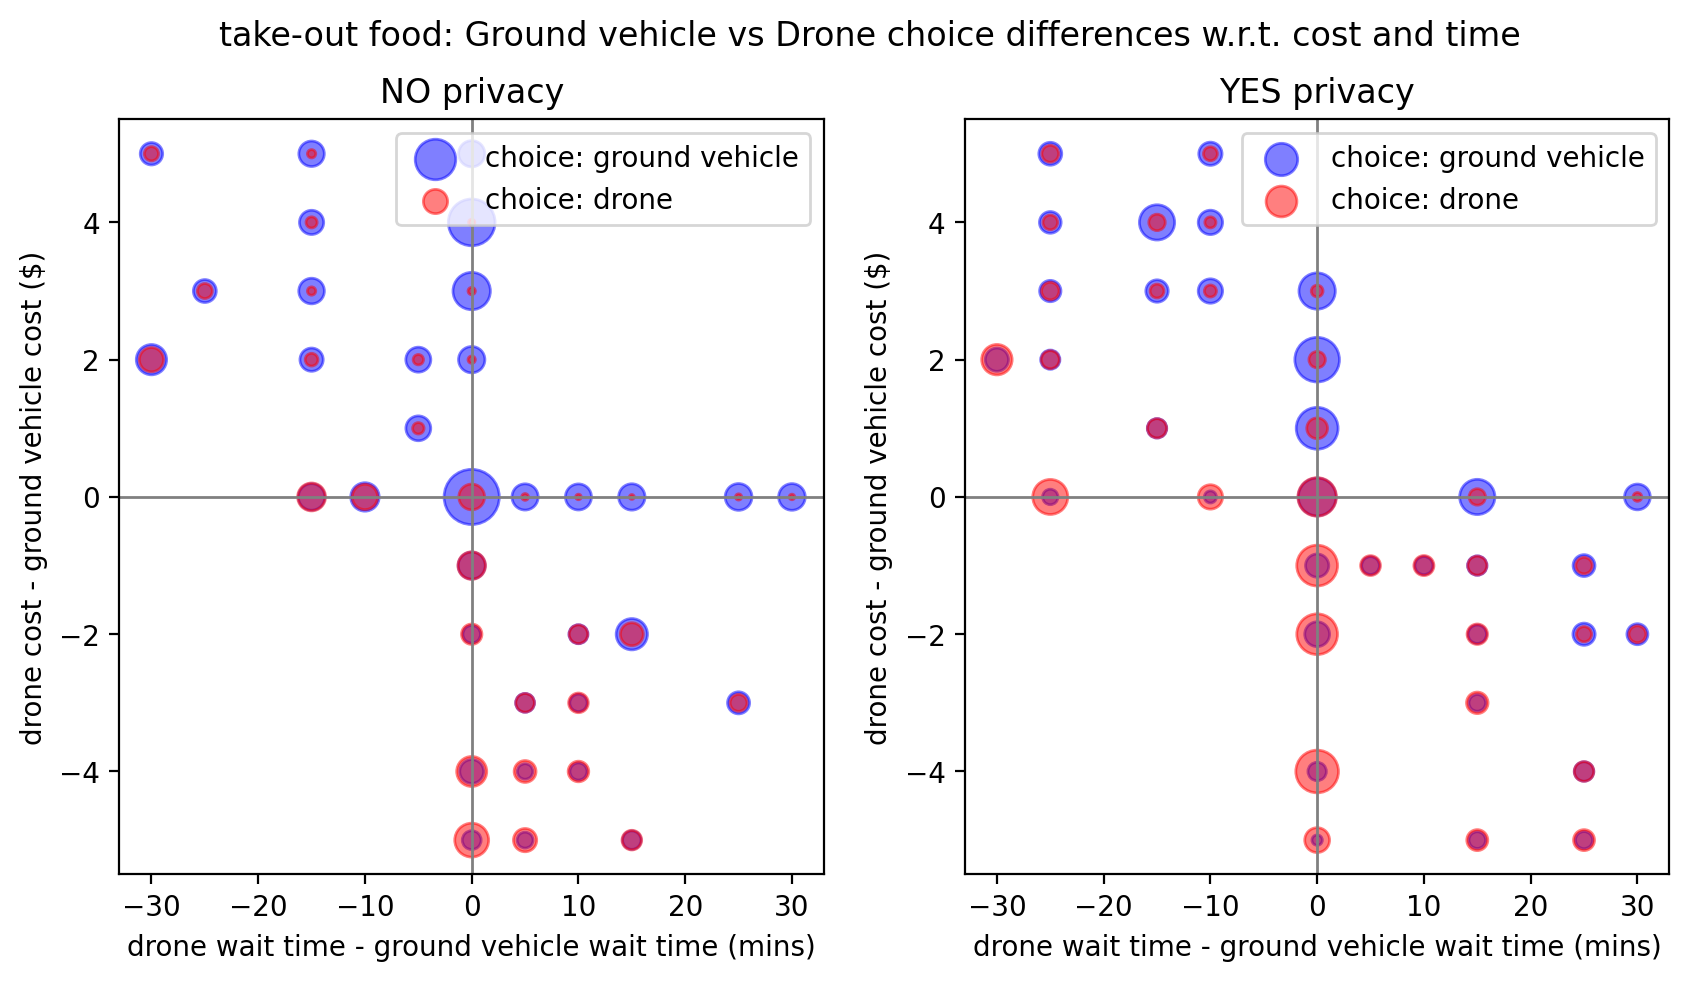

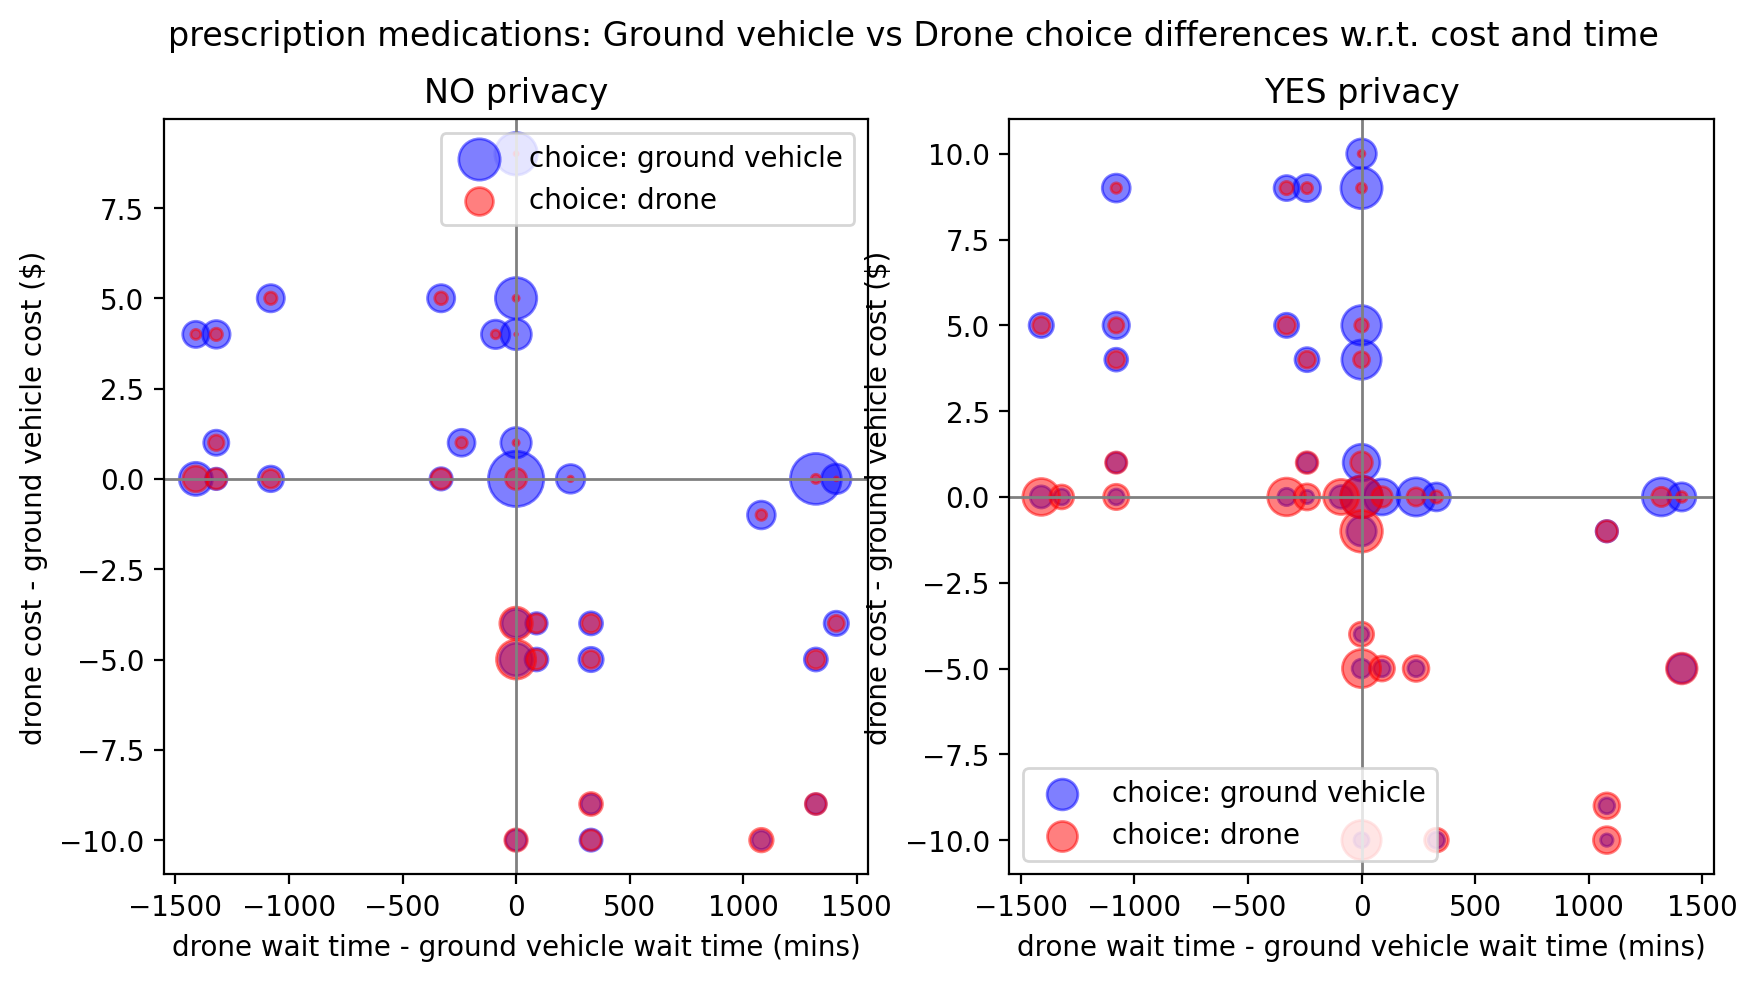

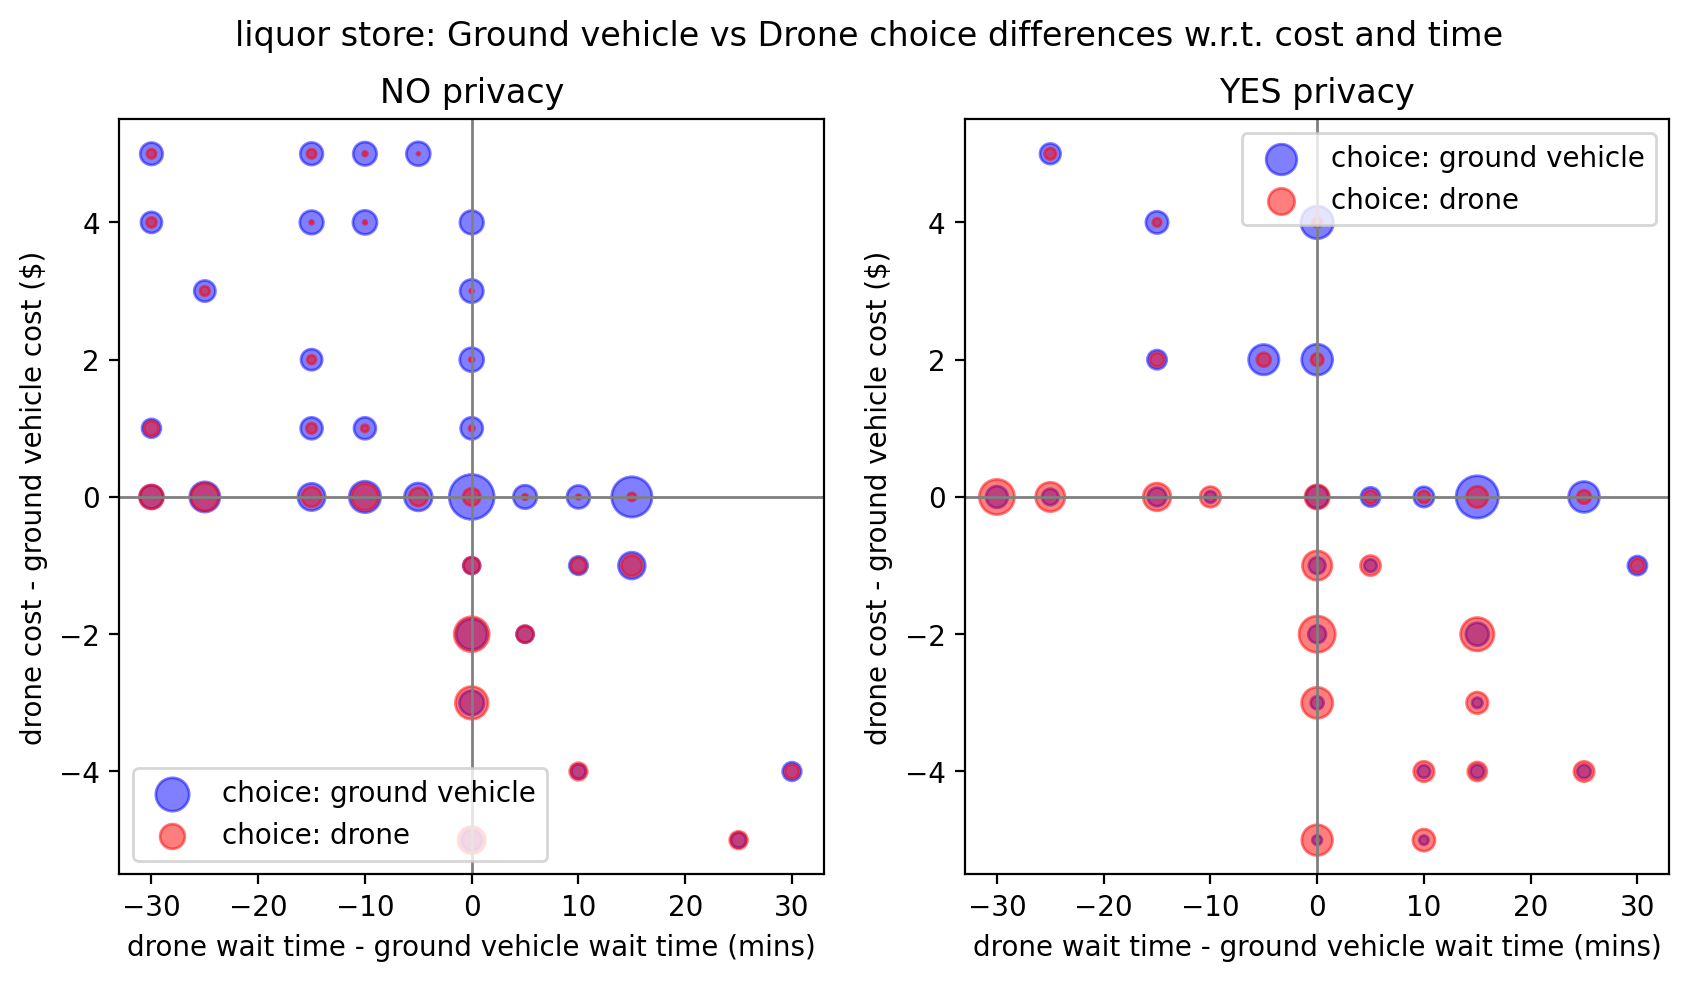

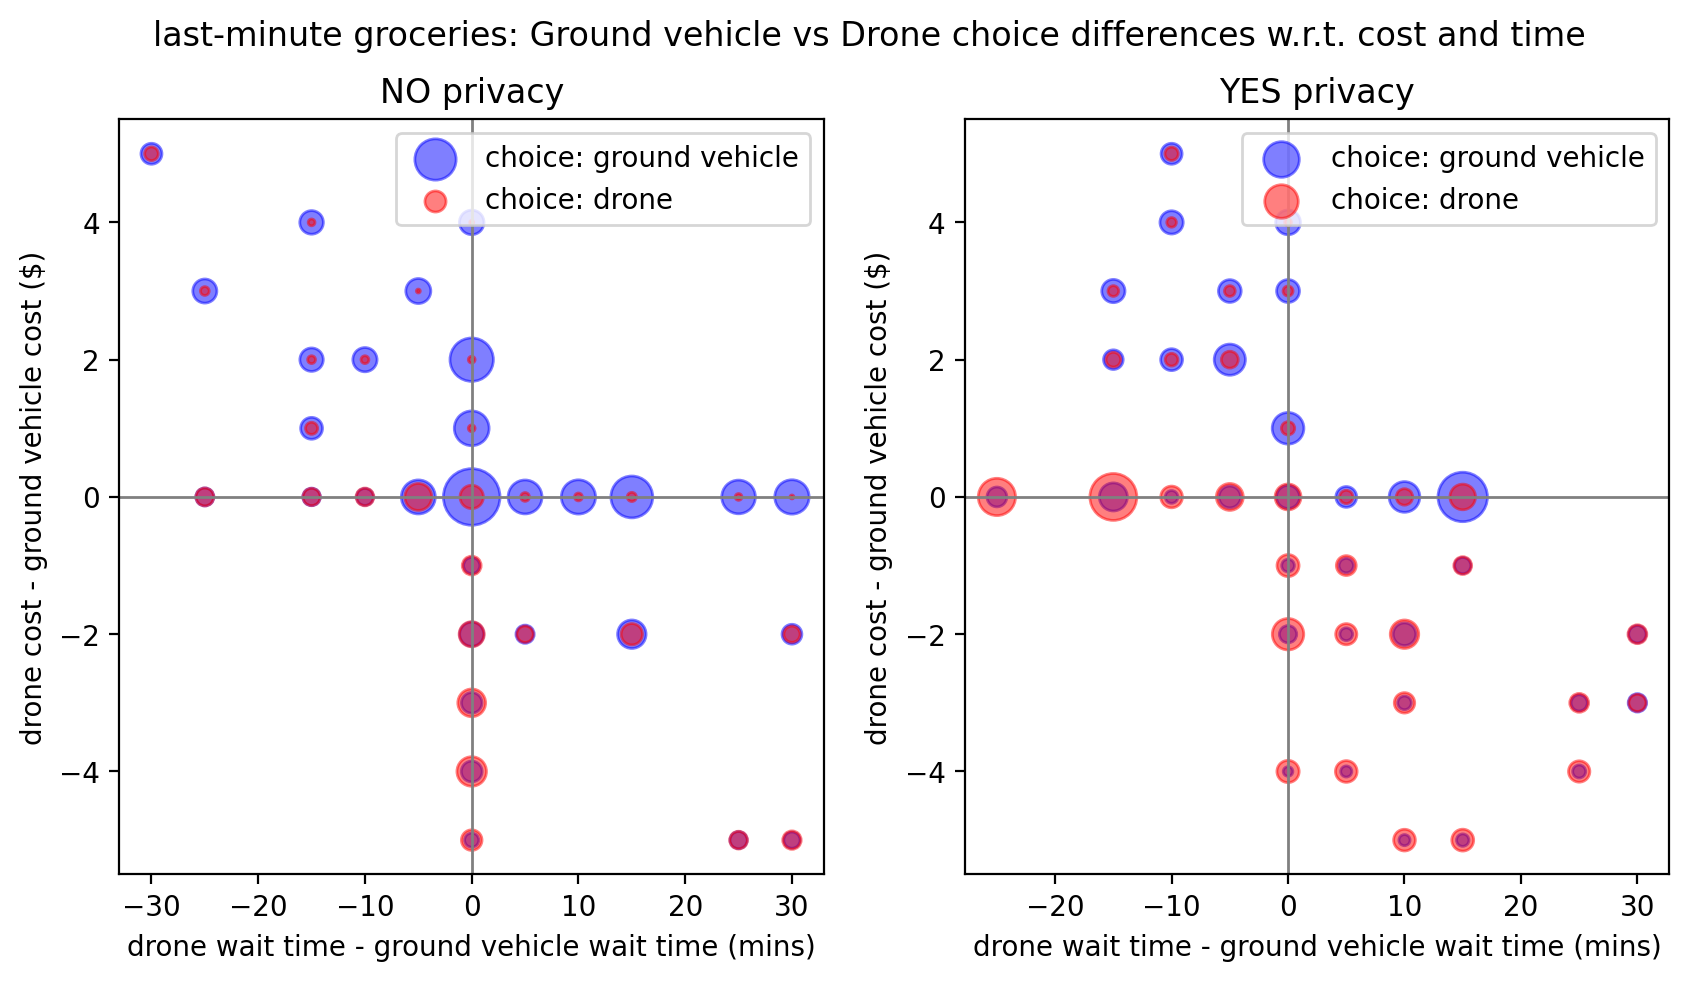

In [17]:
for v, vendor_type in enumerate(VENDOR_TYPES):
    vdf = choices_df[choices_df['v']==v]
    plot_points_tradeoff_by_size(vdf, vendor_type[0])

We use v0,v2,v3

plotting data together for v0,v2,v3 combined


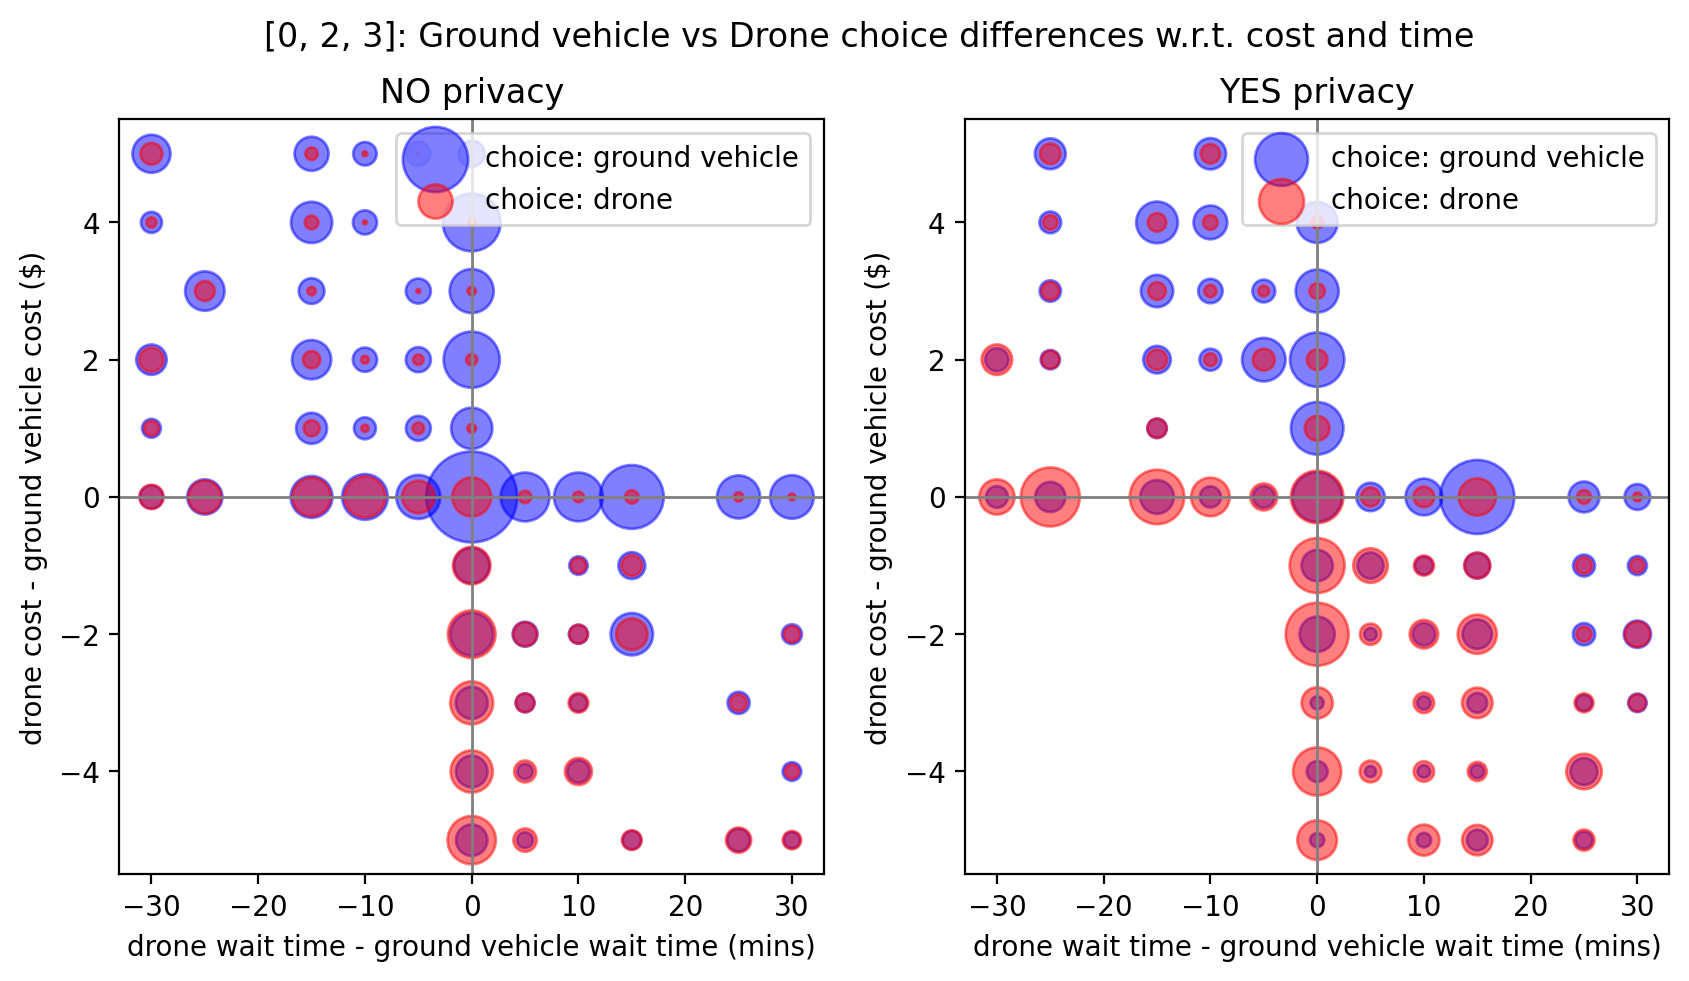

In [18]:
vs = [0,2,3]

vdf = choices_df[choices_df['v'].isin(vs)]
print('plotting data together for v0,v2,v3 combined')
plot_points_tradeoff_by_size(vdf, str(vs))

#### Add a dummy variable for each vendor type

In [19]:
choices_df['takeout_food'] = choices_df['v'].apply(lambda v: 1 if v==0 else 0)
choices_df['liquor_store'] = choices_df['v'].apply(lambda v: 1 if v==2 else 0)
choices_df['groceries'] = choices_df['v'].apply(lambda v: 1 if v==3 else 0)

In [20]:
choices_df.head()

,ResponseId,QID,choice,v,gc,gt,dc,dt,dp,male,...,d_cost,g_time,d_time,d_privacy,d_time - g_time,d_cost - g_cost,ID,takeout_food,liquor_store,groceries
0,R_3dNdOyEHwO3X5Tg,CHOICE_v2_gc0_gt1_dc0_dt0_dp0_1.1,1,2,0,1,0,0,0,1,...,0,20,15,0,-5,0,0,0,1,0
1,R_3dNdOyEHwO3X5Tg,CHOICE_v2_gc2_gt1_dc0_dt1_dp0_1.1,1,2,2,1,0,1,0,1,...,0,20,20,0,0,-3,0,0,1,0
2,R_3dNdOyEHwO3X5Tg,CHOICE_v0_gc0_gt3_dc2_dt1_dp0_1.1,0,0,0,3,2,1,0,1,...,3,45,20,0,-25,3,0,1,0,0
3,R_3dNdOyEHwO3X5Tg,CHOICE_v1_gc3_gt0_dc0_dt2_dp0_1.1,1,1,3,0,0,2,0,1,...,0,30,360,0,330,-10,0,0,0,0
4,R_3dNdOyEHwO3X5Tg,CHOICE_v2_gc3_gt3_dc0_dt3_dp0_1.1,1,2,3,3,0,3,0,1,...,0,45,45,0,0,-5,0,0,1,0


## Biogeme

Documentation: https://transp-or.epfl.ch/documents/technicalReports/Bier20.pdf


In [21]:
import biogeme.database as db
import biogeme.biogeme as bio
from biogeme import models
import biogeme.messaging as msg
from biogeme.expressions import (
    Beta,
    DefineVariable,
    bioDraws,
    PanelLikelihoodTrajectory,
    MonteCarlo,
    log,
)

In [22]:
v = vs

In [23]:
choices_df

,ResponseId,QID,choice,v,gc,gt,dc,dt,dp,male,...,d_cost,g_time,d_time,d_privacy,d_time - g_time,d_cost - g_cost,ID,takeout_food,liquor_store,groceries
0,R_3dNdOyEHwO3X5Tg,CHOICE_v2_gc0_gt1_dc0_dt0_dp0_1.1,1,2,0,1,0,0,0,1,...,0,20,15,0,-5,0,0,0,1,0
1,R_3dNdOyEHwO3X5Tg,CHOICE_v2_gc2_gt1_dc0_dt1_dp0_1.1,1,2,2,1,0,1,0,1,...,0,20,20,0,0,-3,0,0,1,0
2,R_3dNdOyEHwO3X5Tg,CHOICE_v0_gc0_gt3_dc2_dt1_dp0_1.1,0,0,0,3,2,1,0,1,...,3,45,20,0,-25,3,0,1,0,0
3,R_3dNdOyEHwO3X5Tg,CHOICE_v1_gc3_gt0_dc0_dt2_dp0_1.1,1,1,3,0,0,2,0,1,...,0,30,360,0,330,-10,0,0,0,0
4,R_3dNdOyEHwO3X5Tg,CHOICE_v2_gc3_gt3_dc0_dt3_dp0_1.1,1,2,3,3,0,3,0,1,...,0,45,45,0,0,-5,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36292,R_30x9GGNLfYGhLrG,CHOICE_v0_gc1_gt3_dc3_dt2_dp1_1.1,0,0,1,3,3,2,1,0,...,5,45,30,1,-15,4,3714,1,0,0
36293,R_30x9GGNLfYGhLrG,CHOICE_v0_gc1_gt1_dc0_dt2_dp1_1.1,1,0,1,1,0,2,1,0,...,0,20,30,1,10,-1,3714,1,0,0
36294,R_30x9GGNLfYGhLrG,CHOICE_v3_gc1_gt3_dc1_dt3_dp0_1.1,0,3,1,3,1,3,0,0,...,1,45,45,0,0,0,3714,0,0,1
36295,R_30x9GGNLfYGhLrG,CHOICE_v0_gc1_gt0_dc1_dt2_dp1_1.1,0,0,1,0,1,2,1,0,...,1,15,30,1,15,0,3714,1,0,0


In [36]:
model_choice_cols = [
    'ID',         # respondent ID - to model agent level effect
    
    'choice',     # 0=ground vehicle; 1=drone
    'g_cost',     # ground vehicle delivery cost
    'd_cost',     # drone delivery cost
    'g_time',     # ground vehicle delivery wait time
    'd_time',     # drone delivery wait time
    'd_privacy',  # 0=NO PRIVACY; 1=YES PRIVACY (for drone delivery)
     
    # dummy code vendor type
    'takeout_food', 'liquor_store', 'groceries',
    
    # dummy coded (0/1)
    'male',       # 1=male; 0=otherwise
    'age_young',
    'age_old',
    'residence_house',
    'residence_apartment',
    'urban',
    'suburban',
    'rural',
    
    'freq_ecommerce',
    'freq_takeout_food',
    
]

In [37]:
def get_vendor_panel_database(vs, name=None, free_col=True):
    """Returns new fresh database each time."""
    db_name = name if name else 'v%s'%vs
    df = choices_df[choices_df['v'].isin(vs)][model_choice_cols]
    if free_col:
        df['g_free'] = df['g_cost'].apply(lambda c: 1 if c==0 else 0)
        df['d_free'] = df['d_cost'].apply(lambda c: 1 if c==0 else 0)
    database = db.Database(db_name, df)
    database.panel('ID')
    return database

In [38]:
database = get_vendor_panel_database(vs)
database.data.head()

,ID,choice,g_cost,d_cost,g_time,d_time,d_privacy,takeout_food,liquor_store,groceries,...,residence_house,residence_apartment,urban,suburban,rural,freq_ecommerce,freq_takeout_food,g_free,d_free,_biogroups
0,0,1,0,0,20,15,0,0,1,0,...,0,1,1,0,0,0,1,1,1,1
1,0,1,3,0,20,20,0,0,1,0,...,0,1,1,0,0,0,1,0,1,1
2,0,0,0,3,45,20,0,1,0,0,...,0,1,1,0,0,0,1,1,0,1
3,0,1,5,0,45,45,0,0,1,0,...,0,1,1,0,0,0,1,0,1,1
4,0,0,5,5,30,45,1,0,0,1,...,0,1,1,0,0,0,1,0,0,1


In [39]:
database = get_vendor_panel_database(vs)
# To use the names of variables as Python variables.
globals().update(database.variables)
# print(database.variables)
# The Pandas data structure is available as database.data. Use all the
# Pandas functions to invesigate the database
database.data.describe()

,ID,choice,g_cost,d_cost,g_time,d_time,d_privacy,takeout_food,liquor_store,groceries,...,residence_house,residence_apartment,urban,suburban,rural,freq_ecommerce,freq_takeout_food,g_free,d_free,_biogroups
count,24816.000000,24816.000000,24816.000000,24816.000000,24816.000000,24816.000000,24816.000000,24816.000000,24816.000000,24816.000000,...,24816.000000,24816.000000,24816.000000,24816.000000,24816.000000,24816.000000,24816.000000,24816.000000,24816.000000,24816.000000
mean,1854.941973,0.390554,2.315845,2.194350,27.830835,27.477031,0.495205,0.383946,0.292916,0.323138,...,0.707447,0.270189,0.285300,0.554400,0.154981,0.228361,0.077490,0.230093,0.266159,1732.111823
std,1075.406419,0.487884,1.935390,1.932632,11.488343,11.137477,0.499987,0.486355,0.455109,0.467684,...,0.454944,0.444066,0.451566,0.497042,0.361894,0.419785,0.267373,0.420901,0.441957,999.142500
min,0.000000,0.000000,0.000000,0.000000,15.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,919.750000,0.000000,1.000000,0.000000,20.000000,20.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,866.750000
50%,1851.000000,0.000000,3.000000,1.000000,30.000000,30.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1729.000000
75%,2787.000000,1.000000,5.000000,3.000000,45.000000,30.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2597.000000
max,3714.000000,1.000000,5.000000,5.000000,45.000000,45.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3457.000000


In [40]:
# https://transp-or.epfl.ch/documents/technicalReports/Bier20.pdf
# results.data.sampleSize: the sample size N.
# results.data.numberOfObservations: the number of rows in the data file. If the data is not panel, it is the same as the sample size.
# results.data.nparam: the number K of estimated parameters.
# results.data.logLike: the value L∗ of the log likelihood at the final value of the parameters.

def print_biogeme_results(results):
    print('Model: %s' % results.data.modelName)
    print('\n---- Coefficients ----')
    print(results.getEstimatedParameters())
    print('\n---- Model statistics ----\n')
    print('sample size: N=%s' % results.data.sampleSize)
    print('observations: n=%s' % results.data.numberOfObservations)
    print('no. of parameters: K=%s' % results.data.nparam)
    print('log likelihood: LL=%s' % results.data.logLike)
    print('adjusted likelihood ratio index: rho-bar-squared:=%s' % results.data.rhoBarSquare)
    

### RPLM

start with:
- parameters that were consistently important in models for individual vendors
    - ASC variance specification
    - free
- experimental:
    - random cost parameter

- include vendor type in specification

then check:
- alternative specific cost


In [42]:
"""
Using takeout_food as the reference level for vendor type

V_groundvehicle = ASC_g + B_cost * g_cost + B_free * g_free + B_time * g_time

V_drone =  ASC_d + B_cost * d_cost + B_free * d_free + B_time * d_time
    + B_takeout_food * takeout_food (fixed to 0)
    + B_takeout_food_privacy * takeout_food * privacy
    + B_liquor_store * liquor_store + B_liquor_store_privacy * liquor_store * privacy
    + B_groceries * groceries + B_groceries_privacy * groceries * privacy

g_free/d_free are dummy variables indicating whether there is a delivery cost:
    0=not free; 1=free

"""
np.random.seed(seed=12)

database = get_vendor_panel_database(v)
# To use the names of variables as Python variables.
globals().update(database.variables)

# Parameters to be estimated:
# Define random parameters, normally distributed across individuals,
# designed to be used for Monte-Carlo simulation
ASC_G_MEAN = Beta('ASC_G_MEAN', 0, None, None, 1) # fixed to 0 as reference
ASC_G_S = Beta('ASC_G_S', 1, None, None, 0)
ASC_G = ASC_G_MEAN + ASC_G_S * bioDraws('ASC_G', 'NORMAL_ANTI')

ASC_D_MEAN = Beta('ASC_D_MEAN', -2, None, None, 0) # starting value based on other models
ASC_D_S = Beta('ASC_D_S', 1, None, None, 0)
ASC_D = ASC_D_MEAN + ASC_D_S * bioDraws('ASC_D', 'NORMAL_ANTI')

B_COST_MEAN = Beta('B_COST_MEAN', 0, None, None, 0)
B_COST_S = Beta('B_COST_S', 1, None, None, 0)
B_COST = B_COST_MEAN + B_COST_S * bioDraws('B_COST', 'NORMAL_ANTI')

# Assumed generic
B_FREE = Beta('B_FREE', 0, None, None, 0) # assumed generic for now
B_TIME = Beta('B_TIME', 0, None, None, 0)
# B_DPRIVACY = Beta('B_DPRIVACY', 0, None, None, 0) # redundant

B_TAKEOUT_FOOD = Beta('B_TAKEOUT_FOOD', 0, None, None, 1) # Reference level vendor type
B_LIQUOR_STORE = Beta('B_LIQUOR_STORE', 0, None, None, 0)
B_GROCERIES = Beta('B_GROCERIES', 0, None, None, 0)
B_TAKEOUT_FOOD_PRIVACY = Beta('B_TAKEOUT_FOOD_PRIVACY', 0, None, None, 0)
B_LIQUOR_STORE_PRIVACY = Beta('B_LIQUOR_STORE_PRIVACY', 0, None, None, 0)
B_GROCERIES_PRIVACY = Beta('B_GROCERIES_PRIVACY', 0, None, None, 0)

# To be consistent with Biogeme example -- is any availability indicator ever needed?
G_AV = 1
D_AV = 1

# Definition of the utility functions
VG = ASC_G + B_COST*g_cost + B_FREE*g_free + B_TIME*g_time
VD = ASC_D + B_COST*d_cost + B_FREE*d_free + B_TIME*d_time \
    + B_TAKEOUT_FOOD*takeout_food + B_TAKEOUT_FOOD_PRIVACY*takeout_food*d_privacy \
    + B_LIQUOR_STORE*liquor_store + B_LIQUOR_STORE_PRIVACY*liquor_store*d_privacy \
    + B_GROCERIES*groceries + B_GROCERIES_PRIVACY*groceries*d_privacy

# Associate utility functions with the numbering of alternatives
V = {0: VG, 1: VD}
# Associate the availability conditions with the alternatives
av = {0: G_AV, 1: D_AV}

# Definition of the model. This is the contribution of each
# observation to the log likelihood function.

obsprob = models.logit(V, av, choice)
condprobIndiv = PanelLikelihoodTrajectory(obsprob)
logprob = log(MonteCarlo(condprobIndiv))

# Define level of verbosity
msg.bioMessage().setWarning() # .setGeneral() .setDetailed() << other options for messages

# Create the Biogeme object
draws=100
biogeme = bio.BIOGEME(
    database, 
    logprob, 
    numberOfDraws=draws,
    userNotes=(
        'Initial estimation of RPLM.'
    )
)
biogeme.modelName = 'v%s_RPLM_1'%v

print('%s draws' % draws)
print('start time: %s' % time.strftime("%H:%M:%S", time.localtime()))
# Estimate the parameters
rplm_results = biogeme.estimate()
print('end time: %s' % time.strftime("%H:%M:%S", time.localtime()))
print_biogeme_results(rplm_results)

100 draws
start time: 12:19:52
[12:19:52] < Warning >   Cannot read file __v[0, 2, 3]_RPLM_1.iter. Statement is ignored.
end time: 12:25:31
Model: v[0, 2, 3]_RPLM_1

---- Coefficients ----
                           Value   Std err     t-test       p-value  \
ASC_D_MEAN             -1.997951  0.072803 -27.443345  0.000000e+00   
ASC_D_S                -1.350530  0.318272  -4.243325  2.202321e-05   
ASC_G_S                 1.606466  0.273212   5.879931  4.104378e-09   
B_COST_MEAN            -1.022689  0.025861 -39.546228  0.000000e+00   
B_COST_S                0.689988  0.024746  27.882495  0.000000e+00   
B_FREE                  0.503197  0.054674   9.203620  0.000000e+00   
B_GROCERIES            -0.198825  0.083624  -2.377597  1.742587e-02   
B_GROCERIES_PRIVACY     2.036456  0.084987  23.961902  0.000000e+00   
B_LIQUOR_STORE         -0.424595  0.082103  -5.171501  2.322212e-07   
B_LIQUOR_STORE_PRIVACY  2.107017  0.090076  23.391492  0.000000e+00   
B_TAKEOUT_FOOD_PRIVACY  1.7308

In [43]:
rplm_results.getEstimatedParameters().sort_values('p-value')[['Value', 'Std err', 'p-value']]

,Value,Std err,p-value
ASC_D_MEAN,-1.997951,0.072803,0.000000e+00
B_COST_MEAN,-1.022689,0.025861,0.000000e+00
B_COST_S,0.689988,0.024746,0.000000e+00
B_FREE,0.503197,0.054674,0.000000e+00
B_GROCERIES_PRIVACY,2.036456,0.084987,0.000000e+00
B_LIQUOR_STORE_PRIVACY,2.107017,0.090076,0.000000e+00
B_TAKEOUT_FOOD_PRIVACY,1.730813,0.079891,0.000000e+00
B_TIME,-0.103447,0.002358,0.000000e+00
ASC_G_S,1.606466,0.273212,4.104378e-09
B_LIQUOR_STORE,-0.424595,0.082103,2.322212e-07


#### Results overview

- drone is more preferred for take-out food vs liquor store or groceries
- privacy is more valued for liquor store, then groceries, then take-out food

In [46]:
betas = rplm_results.getBetaValues()
# estimated value of time:
# B_TIME/B_COST ($1/1 minute)
vot_g = betas['B_TIME']/betas['B_COST_MEAN']
print('VOT ($/minute): %0.2f' % vot_g)

# what is the value of free? How much extra time would you wait?
tradeoff = betas['B_FREE']/betas['B_TIME']
print('willing to trade %0.2f minutes of time for free?' % tradeoff)

print('how to evaluate value of privacy?')
vop = betas['B_TAKEOUT_FOOD_PRIVACY']/betas['B_COST_MEAN']
print('value of privacy ($) for take-out food: %0.2f' % vop)
# B_PRIVACY/B_COST

VOT ($/minute): 0.10
willing to trade -4.86 minutes of time for free?
how to evaluate value of privacy?
value of privacy ($) for take-out food: -1.69


Unrestricted model version

where cost is alternative specific

In [47]:
"""
Using takeout_food as the reference level for vendor type (fixed to 0)

V_groundvehicle = ASC_g + B_g_cost * g_cost + B_free * g_free + B_time * g_time
    + B_takeout_food * takeout_food 
    + B_liquor_store * liquor_store 
    + B_groceries * groceries

V_drone =  ASC_d + B_d_cost * d_cost + B_free * d_free + B_time * d_time + B_dprivacy * d_privacy
    + B_takeout_food * takeout_food + B_takeout_food_privacy * takeout_food * privacy
    + B_liquor_store * liquor_store + B_liquor_store_privacy * liquor_store * privacy
    + B_groceries * groceries + B_groceries_privacy * groceries * privacy

g_free/d_free are dummy variables indicating whether there is a delivery cost:
    0=not free; 1=free

"""

np.random.seed(seed=12)

database = get_vendor_panel_database(v)
# To use the names of variables as Python variables.
globals().update(database.variables)

# Parameters to be estimated:
# Define random parameters, normally distributed across individuals,
# designed to be used for Monte-Carlo simulation
ASC_G_MEAN = Beta('ASC_G_MEAN', 0, None, None, 1) # fixed to 0 as reference
ASC_G_S = Beta('ASC_G_S', 1, None, None, 0)
ASC_G = ASC_G_MEAN + ASC_G_S * bioDraws('ASC_G', 'NORMAL_ANTI')

ASC_D_MEAN = Beta('ASC_D_MEAN', -2, None, None, 0) # starting value based on other models
ASC_D_S = Beta('ASC_D_S', 1, None, None, 0)
ASC_D = ASC_D_MEAN + ASC_D_S * bioDraws('ASC_D', 'NORMAL_ANTI')

B_G_COST_MEAN = Beta('B_G_COST_MEAN', 0, None, None, 0)
B_G_COST_S = Beta('B_G_COST_S', 1, None, None, 0)
B_G_COST = B_G_COST_MEAN + B_G_COST_S * bioDraws('B_G_COST', 'NORMAL_ANTI')

B_D_COST_MEAN = Beta('B_D_COST_MEAN', 0, None, None, 0)
B_D_COST_S = Beta('B_D_COST_S', 1, None, None, 0)
B_D_COST = B_D_COST_MEAN + B_D_COST_S * bioDraws('B_D_COST', 'NORMAL_ANTI')

# Assumed generic
B_FREE = Beta('B_FREE', 0, None, None, 0) # assumed generic for now
B_TIME = Beta('B_TIME', 0, None, None, 0)

B_TAKEOUT_FOOD = Beta('B_TAKEOUT_FOOD', 0, None, None, 1) # Fixed to 0 as reference level vendor
B_LIQUOR_STORE = Beta('B_LIQUOR_STORE', 0, None, None, 0)
B_GROCERIES = Beta('B_GROCERIES', 0, None, None, 0)
B_TAKEOUT_FOOD_PRIVACY = Beta('B_TAKEOUT_FOOD_PRIVACY', 0, None, None, 0)
B_LIQUOR_STORE_PRIVACY = Beta('B_LIQUOR_STORE_PRIVACY', 0, None, None, 0)
B_GROCERIES_PRIVACY = Beta('B_GROCERIES_PRIVACY', 0, None, None, 0)

# To be consistent with Biogeme example -- is any availability indicator ever needed?
G_AV = 1
D_AV = 1

# Definition of the utility functions
VG = ASC_G + B_G_COST*g_cost + B_FREE*g_free + B_TIME*g_time
VD = ASC_D + B_D_COST*d_cost + B_FREE*d_free + B_TIME*d_time \
    + B_TAKEOUT_FOOD*takeout_food + B_TAKEOUT_FOOD_PRIVACY*takeout_food*d_privacy \
    + B_LIQUOR_STORE*liquor_store + B_LIQUOR_STORE_PRIVACY*liquor_store*d_privacy \
    + B_GROCERIES*groceries + B_GROCERIES_PRIVACY*groceries*d_privacy

# Associate utility functions with the numbering of alternatives
V = {0: VG, 1: VD}
# Associate the availability conditions with the alternatives
av = {0: G_AV, 1: D_AV}

# Definition of the model. This is the contribution of each
# observation to the log likelihood function.
obsprob = models.logit(V, av, choice)
condprobIndiv = PanelLikelihoodTrajectory(obsprob)
logprob = log(MonteCarlo(condprobIndiv))

# Define level of verbosity
msg.bioMessage().setWarning() # .setGeneral() .setDetailed() << other options for messages

# Create the Biogeme object
draws=200
biogeme = bio.BIOGEME(
    database, 
    logprob, 
    numberOfDraws=draws,
    userNotes=(
        'Alternative specific estimation of RPLM.'
    )
)
biogeme.modelName = 'v%s_as_cost_RPLM_1'%v

print('%s draws' % draws)
print('start time: %s' % time.strftime("%H:%M:%S", time.localtime()))
# Estimate the parameters
as_rplm_results = biogeme.estimate()
print('end time: %s' % time.strftime("%H:%M:%S", time.localtime()))
print_biogeme_results(as_rplm_results)

200 draws
start time: 12:31:09
[12:31:09] < Warning >   Cannot read file __v[0, 2, 3]_as_cost_RPLM_1.iter. Statement is ignored.
end time: 12:53:57
Model: v[0, 2, 3]_as_cost_RPLM_1

---- Coefficients ----
                           Value   Std err     t-test       p-value  \
ASC_D_MEAN             -1.613940  0.070522 -22.885617  0.000000e+00   
ASC_D_S                 1.183329  0.133185   8.884842  0.000000e+00   
ASC_G_S                 1.175678  0.142410   8.255598  2.220446e-16   
B_D_COST_MEAN          -0.946678  0.025631 -36.934956  0.000000e+00   
B_D_COST_S              0.386198  0.022917  16.852279  0.000000e+00   
B_FREE                  0.372248  0.050689   7.343784  2.076117e-13   
B_GROCERIES            -0.290810  0.079665  -3.650427  2.618046e-04   
B_GROCERIES_PRIVACY     1.980033  0.082892  23.886978  0.000000e+00   
B_G_COST_MEAN          -0.827388  0.021445 -38.581671  0.000000e+00   
B_G_COST_S             -0.468038  0.022783 -20.543359  0.000000e+00   
B_LIQUOR_STORE

In [48]:
as_rplm_results.getEstimatedParameters().sort_values('p-value')[['Value', 'Std err', 'p-value']]

,Value,Std err,p-value
ASC_D_MEAN,-1.613940,0.070522,0.000000e+00
ASC_D_S,1.183329,0.133185,0.000000e+00
B_D_COST_MEAN,-0.946678,0.025631,0.000000e+00
B_D_COST_S,0.386198,0.022917,0.000000e+00
B_GROCERIES_PRIVACY,1.980033,0.082892,0.000000e+00
B_G_COST_MEAN,-0.827388,0.021445,0.000000e+00
B_G_COST_S,-0.468038,0.022783,0.000000e+00
B_LIQUOR_STORE_PRIVACY,1.980130,0.087921,0.000000e+00
B_TAKEOUT_FOOD_PRIVACY,1.587111,0.075170,0.000000e+00
B_TIME,-0.097351,0.002280,0.000000e+00


#### Results overview


- Alternative specific cost noticably improves this model (rho-bar-squared)
- All coefficients are statistically significant
- again: vendor type influences mode choice. in order of preference for drone:
    - take-out food
    - groceries
    - liquor store

- privacy valued least for take-out food
- privacy value nearly identical for liquor store and groceries

### Demographic variables and interactions with privacy parameter

We add in the following parameters which we assume are generic across drone and ground vehicle delivery.

- gender: male/non-male (1/0)
- age: age_young, age_old (0/1)
- residential type: residence_house, residence_apartment (0/1)
- residential area: urban, suburban, rural (0/1)

In [49]:
"""
Using takeout_food as the reference level for vendor type

V_groundvehicle = ASC_g + B_g_cost * g_cost + B_free * g_free + B_time * g_time
    + B_takeout_food * takeout_food 
    + B_liquor_store * liquor_store 
    + B_groceries * groceries
    + [demographic variables]

V_drone =  ASC_d + B_d_cost * d_cost + B_free * d_free + B_time * d_time
    + B_takeout_food * takeout_food + B_takeout_food_privacy * takeout_food * privacy
    + B_liquor_store * liquor_store + B_liquor_store_privacy * liquor_store * privacy
    + B_groceries * groceries + B_groceries_privacy * groceries * privacy
    + [demographic variables] + [demographic variables] * privacy

g_free/d_free are dummy variables indicating whether there is a delivery cost:
    0=not free; 1=free

"""

np.random.seed(seed=12)

database = get_vendor_panel_database(v)
# To use the names of variables as Python variables.
globals().update(database.variables)

# Parameters to be estimated:
# Define random parameters, normally distributed across individuals,
# designed to be used for Monte-Carlo simulation
ASC_G_MEAN = Beta('ASC_G_MEAN', 0, None, None, 1) # fixed to 0 as reference
ASC_G_S = Beta('ASC_G_S', 1, None, None, 0)
ASC_G = ASC_G_MEAN + ASC_G_S * bioDraws('ASC_G', 'NORMAL_ANTI')

ASC_D_MEAN = Beta('ASC_D_MEAN', -1.6, None, None, 0) # starting value based on other models
ASC_D_S = Beta('ASC_D_S', 1, None, None, 0)
ASC_D = ASC_D_MEAN + ASC_D_S * bioDraws('ASC_D', 'NORMAL_ANTI')

B_G_COST_MEAN = Beta('B_G_COST_MEAN', 0, None, None, 0)
B_G_COST_S = Beta('B_G_COST_S', 1, None, None, 0)
B_G_COST = B_G_COST_MEAN + B_G_COST_S * bioDraws('B_G_COST', 'NORMAL_ANTI')

B_D_COST_MEAN = Beta('B_D_COST_MEAN', 0, None, None, 0)
B_D_COST_S = Beta('B_D_COST_S', 1, None, None, 0)
B_D_COST = B_D_COST_MEAN + B_D_COST_S * bioDraws('B_D_COST', 'NORMAL_ANTI')

# Assumed generic
B_FREE = Beta('B_FREE', 0, None, None, 0) # assumed generic for now
B_TIME = Beta('B_TIME', 0, None, None, 0)

B_TAKEOUT_FOOD = Beta('B_TAKEOUT_FOOD', 0, None, None, 1) # Fixed to 0 as reference level vendor
B_LIQUOR_STORE = Beta('B_LIQUOR_STORE', 0, None, None, 0)
B_GROCERIES = Beta('B_GROCERIES', 0, None, None, 0)
B_TAKEOUT_FOOD_PRIVACY = Beta('B_TAKEOUT_FOOD_PRIVACY', 0, None, None, 0)
B_LIQUOR_STORE_PRIVACY = Beta('B_LIQUOR_STORE_PRIVACY', 0, None, None, 0)
B_GROCERIES_PRIVACY = Beta('B_GROCERIES_PRIVACY', 0, None, None, 0)

# demographic variables
B_MALE = Beta('B_MALE', 0, None, None, 0)
B_MALE_PRIVACY = Beta('B_MALE_PRIVACY', 0, None, None, 0)

B_AGE_YOUNG = Beta('B_AGE_YOUNG', 0, None, None, 0)
B_AGE_OLD = Beta('B_AGE_OLD', 0, None, None, 0)
B_AGE_YOUNG_PRIVACY = Beta('B_AGE_YOUNG_PRIVACY', 0, None, None, 0)
B_AGE_OLD_PRIVACY = Beta('B_AGE_OLD_PRIVACY', 0, None, None, 0)

B_RESIDENCE_HOUSE = Beta('B_RESIDENCE_HOUSE', 0, None, None, 0)
B_RESIDENCE_APARTMENT = Beta('B_RESIDENCE_APARTMENT', 0, None, None, 0)
B_RESIDENCE_HOUSE_PRIVACY = Beta('B_RESIDENCE_HOUSE_PRIVACY', 0, None, None, 0)
B_RESIDENCE_APARTMENT_PRIVACY = Beta('B_RESIDENCE_APARTMENT_PRIVACY', 0, None, None, 0)

B_URBAN = Beta('B_URBAN', 0, None, None, 0)
B_SUBURBAN = Beta('B_SUBURBAN', 0, None, None, 0)
B_RURAL = Beta('B_RURAL', 0, None, None, 0)
B_URBAN_PRIVACY = Beta('B_URBAN_PRIVACY', 0, None, None, 0)
B_SUBURBAN_PRIVACY = Beta('B_SUBURBAN_PRIVACY', 0, None, None, 0)
B_RURAL_PRIVACY = Beta('B_RURAL_PRIVACY', 0, None, None, 0)

# To be consistent with Biogeme example -- is any availability indicator ever needed?
G_AV = 1
D_AV = 1

# Definition of the utility functions
VG = ASC_G + B_G_COST*g_cost + B_FREE*g_free + B_TIME*g_time
    
VD = ASC_D + B_D_COST*d_cost + B_FREE*d_free + B_TIME*d_time \
    + B_TAKEOUT_FOOD*takeout_food + B_TAKEOUT_FOOD_PRIVACY*takeout_food*d_privacy \
    + B_LIQUOR_STORE*liquor_store + B_LIQUOR_STORE_PRIVACY*liquor_store*d_privacy \
    + B_GROCERIES*groceries + B_GROCERIES_PRIVACY*groceries*d_privacy \
    + B_MALE*male + B_MALE_PRIVACY*male*d_privacy \
    + B_AGE_YOUNG*age_young + B_AGE_OLD*age_old \
    + B_AGE_YOUNG_PRIVACY*age_young*d_privacy + B_AGE_OLD_PRIVACY*age_old*d_privacy \
    + B_RESIDENCE_HOUSE*residence_house + B_RESIDENCE_HOUSE_PRIVACY*residence_house*d_privacy \
    + B_RESIDENCE_APARTMENT*residence_apartment + B_RESIDENCE_APARTMENT_PRIVACY*residence_apartment*d_privacy \
    + B_URBAN*urban + B_URBAN_PRIVACY*urban*d_privacy \
    + B_SUBURBAN*suburban + B_SUBURBAN_PRIVACY*suburban*d_privacy \
    + B_RURAL*rural + B_RURAL_PRIVACY*rural*d_privacy

# Associate utility functions with the numbering of alternatives
V = {0: VG, 1: VD}
# Associate the availability conditions with the alternatives
av = {0: G_AV, 1: D_AV}

# Definition of the model. This is the contribution of each
# observation to the log likelihood function.

obsprob = models.logit(V, av, choice)
condprobIndiv = PanelLikelihoodTrajectory(obsprob)
logprob = log(MonteCarlo(condprobIndiv))

# Define level of verbosity
msg.bioMessage().setWarning() # .setGeneral() .setDetailed() << other options for messages

# Create the Biogeme object
draws=200
biogeme = bio.BIOGEME(
    database, 
    logprob, 
    numberOfDraws=draws,
    userNotes=(
        'Alternative specific estimation of RPLM with demographic variables.'
    )
)
biogeme.modelName = 'v%s_RPLM_demos_1'%v

print('%s draws' % draws)
print('start time: %s' % time.strftime("%H:%M:%S", time.localtime()))
# Estimate the parameters
rplm_demos_1_results = biogeme.estimate()
print('end time: %s' % time.strftime("%H:%M:%S", time.localtime()))
print_biogeme_results(rplm_demos_1_results)

200 draws
start time: 14:08:05
[14:08:05] < Warning >   Cannot read file __v[0, 2, 3]_RPLM_demos_1.iter. Statement is ignored.
end time: 15:18:05
Model: v[0, 2, 3]_RPLM_demos_1

---- Coefficients ----
                                  Value   Std err     t-test       p-value  \
ASC_D_MEAN                    -2.640079  0.695765  -3.794497  1.479431e-04   
ASC_D_S                        1.327516  0.138437   9.589320  0.000000e+00   
ASC_G_S                        0.985340  0.183414   5.372207  7.777883e-08   
B_AGE_OLD                     -0.493550  0.160115  -3.082474  2.052876e-03   
B_AGE_OLD_PRIVACY             -0.051904  0.156633  -0.331374  7.403621e-01   
B_AGE_YOUNG                    0.052151  0.099808   0.522518  6.013094e-01   
B_AGE_YOUNG_PRIVACY            0.398790  0.096392   4.137168  3.516181e-05   
B_D_COST_MEAN                 -0.944916  0.025432 -37.155314  0.000000e+00   
B_D_COST_S                     0.378528  0.022182  17.064371  0.000000e+00   
B_FREE             

In [51]:
rplm_demos_1_results.getEstimatedParameters().sort_values('p-value')[
    ['Value', 'Std err', 'p-value']
]

,Value,Std err,p-value
ASC_D_S,1.327516,0.138437,0.000000e+00
B_TIME,-0.097401,0.002283,0.000000e+00
B_D_COST_MEAN,-0.944916,0.025432,0.000000e+00
B_D_COST_S,0.378528,0.022182,0.000000e+00
B_G_COST_S,0.458876,0.022732,0.000000e+00
B_G_COST_MEAN,-0.822899,0.021119,0.000000e+00
B_FREE,0.376723,0.050645,1.019185e-13
B_MALE,0.680132,0.093251,3.017586e-13
B_LIQUOR_STORE,-0.440479,0.078704,2.185491e-08
ASC_G_S,0.985340,0.183414,7.777883e-08


#### Results overview

vendor type
- preference for drones in order of:
    - take-out food
    - groceries
    - liquor store
    
- value of privacy in order of
    - groceries
    - liquor store (nearly equal to groceries)
    - take-out food

residence area
- Residence area and type not statistically significant

gender
- Males slighlty prefer drones than non-males
- Males slightly value privacy less than non-males

age
- older ppl less likely to prefer drone
- younger ppl have greater value on privacy

### Consumer behavior attributes and interactions with privacy parameter

We add in the following attributes which we assume are generic across drone and ground vehicle delivery.

- freq_ecommerce: online shopping more than 1x/week (0/1)
- freq_takeout_food: take-out food delivery more than 1x/week

In [53]:
"""
Using takeout_food as the reference level for vendor type

V_groundvehicle = ASC_g + B_g_cost * g_cost + B_free * g_free + B_time * g_time
    + B_takeout_food * takeout_food 
    + B_liquor_store * liquor_store 
    + B_groceries * groceries
    + [demographic variables]

V_drone =  ASC_d + B_d_cost * d_cost + B_free * d_free + B_time * d_time
    + B_takeout_food * takeout_food + B_takeout_food_privacy * takeout_food * privacy
    + B_liquor_store * liquor_store + B_liquor_store_privacy * liquor_store * privacy
    + B_groceries * groceries + B_groceries_privacy * groceries * privacy
    + [demographic variables] + [demographic variables] * privacy

g_free/d_free are dummy variables indicating whether there is a delivery cost:
    0=not free; 1=free

"""

np.random.seed(seed=12)

database = get_vendor_panel_database(v)
# To use the names of variables as Python variables.
globals().update(database.variables)

# Parameters to be estimated:
# Define random parameters, normally distributed across individuals,
# designed to be used for Monte-Carlo simulation
ASC_G_MEAN = Beta('ASC_G_MEAN', 0, None, None, 1) # fixed to 0 as reference
ASC_G_S = Beta('ASC_G_S', 1, None, None, 0)
ASC_G = ASC_G_MEAN + ASC_G_S * bioDraws('ASC_G', 'NORMAL_ANTI')

ASC_D_MEAN = Beta('ASC_D_MEAN', -1.6, None, None, 0) # starting value based on other models
ASC_D_S = Beta('ASC_D_S', 1, None, None, 0)
ASC_D = ASC_D_MEAN + ASC_D_S * bioDraws('ASC_D', 'NORMAL_ANTI')

B_G_COST_MEAN = Beta('B_G_COST_MEAN', 0, None, None, 0)
B_G_COST_S = Beta('B_G_COST_S', 1, None, None, 0)
B_G_COST = B_G_COST_MEAN + B_G_COST_S * bioDraws('B_G_COST', 'NORMAL_ANTI')

B_D_COST_MEAN = Beta('B_D_COST_MEAN', 0, None, None, 0)
B_D_COST_S = Beta('B_D_COST_S', 1, None, None, 0)
B_D_COST = B_D_COST_MEAN + B_D_COST_S * bioDraws('B_D_COST', 'NORMAL_ANTI')

# Assumed generic
B_FREE = Beta('B_FREE', 0, None, None, 0) # assumed generic for now
B_TIME = Beta('B_TIME', 0, None, None, 0)

B_TAKEOUT_FOOD = Beta('B_TAKEOUT_FOOD', 0, None, None, 1) # Fixed to 0 as reference level vendor
B_LIQUOR_STORE = Beta('B_LIQUOR_STORE', 0, None, None, 0)
B_GROCERIES = Beta('B_GROCERIES', 0, None, None, 0)
B_TAKEOUT_FOOD_PRIVACY = Beta('B_TAKEOUT_FOOD_PRIVACY', 0, None, None, 0)
B_LIQUOR_STORE_PRIVACY = Beta('B_LIQUOR_STORE_PRIVACY', 0, None, None, 0)
B_GROCERIES_PRIVACY = Beta('B_GROCERIES_PRIVACY', 0, None, None, 0)

# consumer behavior variables
B_FREQ_ECOMMERCE = Beta('B_FREQ_ECOMMERCE', 0, None, None, 0)
B_FREQ_ECOMMERCE_PRIVACY = Beta('B_FREQ_ECOMMERCE_PRIVACY', 0, None, None, 0)
B_FREQ_TAKEOUT_FOOD = Beta('B_FREQ_TAKEOUT_FOOD', 0, None, None, 0)
B_FREQ_TAKEOUT_FOOD_PRIVACY = Beta('B_FREQ_TAKEOUT_FOOD_PRIVACY', 0, None, None, 0)

# To be consistent with Biogeme example -- is any availability indicator ever needed?
G_AV = 1
D_AV = 1

# Definition of the utility functions
VG = ASC_G + B_G_COST*g_cost + B_FREE*g_free + B_TIME*g_time
    
VD = ASC_D + B_D_COST*d_cost + B_FREE*d_free + B_TIME*d_time \
    + B_TAKEOUT_FOOD*takeout_food + B_TAKEOUT_FOOD_PRIVACY*takeout_food*d_privacy \
    + B_LIQUOR_STORE*liquor_store + B_LIQUOR_STORE_PRIVACY*liquor_store*d_privacy \
    + B_GROCERIES*groceries + B_GROCERIES_PRIVACY*groceries*d_privacy \
    + B_FREQ_ECOMMERCE*freq_ecommerce \
    + B_FREQ_ECOMMERCE_PRIVACY*freq_ecommerce*d_privacy \
    + B_FREQ_TAKEOUT_FOOD*freq_takeout_food \
    + B_FREQ_TAKEOUT_FOOD_PRIVACY*freq_takeout_food*d_privacy

# Associate utility functions with the numbering of alternatives
V = {0: VG, 1: VD}
# Associate the availability conditions with the alternatives
av = {0: G_AV, 1: D_AV}

# Definition of the model. This is the contribution of each
# observation to the log likelihood function.
obsprob = models.logit(V, av, choice)
condprobIndiv = PanelLikelihoodTrajectory(obsprob)
logprob = log(MonteCarlo(condprobIndiv))

# Define level of verbosity
msg.bioMessage().setWarning() # .setGeneral() .setDetailed() << other options for messages

# Create the Biogeme object
draws=200
biogeme = bio.BIOGEME(
    database, 
    logprob, 
    numberOfDraws=draws,
    userNotes=(
        'RPLM with consumer behavior variables.'
    )
)
biogeme.modelName = 'v%s_RPLM_consumer'%v

print('%s draws' % draws)
print('start time: %s' % time.strftime("%H:%M:%S", time.localtime()))
# Estimate the parameters
rplm_cons_results = biogeme.estimate()
print('end time: %s' % time.strftime("%H:%M:%S", time.localtime()))
print_biogeme_results(rplm_cons_results)

200 draws
start time: 16:13:35
end time: 17:04:24
Model: v[0, 2, 3]_RPLM_consumer

---- Coefficients ----
                                Value   Std err     t-test       p-value  \
ASC_D_MEAN                  -1.704815  0.075691 -22.523279  0.000000e+00   
ASC_D_S                      1.218603  0.123491   9.867919  0.000000e+00   
ASC_G_S                      1.130562  0.140129   8.068011  6.661338e-16   
B_D_COST_MEAN               -0.947419  0.025646 -36.941720  0.000000e+00   
B_D_COST_S                   0.388214  0.022913  16.943145  0.000000e+00   
B_FREE                       0.373777  0.050730   7.367950  1.731948e-13   
B_FREQ_ECOMMERCE             0.332506  0.112414   2.957860  3.097829e-03   
B_FREQ_ECOMMERCE_PRIVACY    -0.124572  0.107013  -1.164084  2.443900e-01   
B_FREQ_TAKEOUT_FOOD          0.192459  0.176314   1.091568  2.750232e-01   
B_FREQ_TAKEOUT_FOOD_PRIVACY -0.230983  0.164925  -1.400535  1.613530e-01   
B_GROCERIES                 -0.298097  0.079793  -3.735869

In [54]:
rplm_cons_results.getEstimatedParameters().sort_values('p-value')[['Value', 'Std err', 'p-value']]

,Value,Std err,p-value
ASC_D_MEAN,-1.704815,0.075691,0.000000e+00
B_LIQUOR_STORE_PRIVACY,2.029358,0.091860,0.000000e+00
B_G_COST_S,-0.470194,0.022616,0.000000e+00
B_G_COST_MEAN,-0.828770,0.021494,0.000000e+00
B_GROCERIES_PRIVACY,2.034034,0.088014,0.000000e+00
B_TAKEOUT_FOOD_PRIVACY,1.634507,0.079483,0.000000e+00
B_TIME,-0.097468,0.002283,0.000000e+00
B_D_COST_S,0.388214,0.022913,0.000000e+00
B_D_COST_MEAN,-0.947419,0.025646,0.000000e+00
ASC_D_S,1.218603,0.123491,0.000000e+00


#### Results overview



## Next steps

- test time as random parameter?
- test time as alternative specific?